# project 3 : Microsoft Stock Market

## Problem statement

For invesments and business world, here is a  time series Microsoft Stock Market From 2001 to 2021. 

In [2]:

import requests
import pandas as pd
from time import sleep
import matplotlib.pyplot as plt



### Load using API

In [137]:
#Download Html page 

# result = requests.get("https://api.twelvedata.com/time_series?symbol=MSFT&interval=1day&outputsize=5000&apikey=a4199ce1a9cb42759bf8e9b2bfb7257a")
# result.status_code

200

#### Data Description

Microsoft Company (**MSFT**)


|column|Description|
|--|--|
|**datetime**| datetime in UTC referring to when the bar with specified interval was opened|
|**open**|	The price of MSFT when the stock market opens|
|**high**|	The highest price of MSFT during that trading day|
|**low**|	The lowest price of MSFT during that trading day|
|**close**|	The price of MSFT when the stock market closes|


In [138]:
#see the file
result.text

'{"meta":{"symbol":"MSFT","interval":"1day","currency":"USD","exchange_timezone":"America/New_York","exchange":"NASDAQ","type":"Common Stock"},"values":[{"datetime":"2021-01-29","open":"235.99001","high":"238.01500","low":"231.36000","close":"231.96001","volume":"40004239"},{"datetime":"2021-01-28","open":"235.61000","high":"242.64000","low":"235.09000","close":"238.92999","volume":"48990000"},{"datetime":"2021-01-27","open":"238.00000","high":"240.44000","low":"230.14000","close":"232.89999","volume":"69757500"},{"datetime":"2021-01-26","open":"231.86000","high":"234.17999","low":"230.08000","close":"232.33000","volume":"48699200"},{"datetime":"2021-01-25","open":"229.12000","high":"229.78000","low":"224.22000","close":"229.53000","volume":"33152095"},{"datetime":"2021-01-22","open":"227.08000","high":"230.07001","low":"225.80000","close":"225.95000","volume":"30124900"},{"datetime":"2021-01-21","open":"224.70000","high":"226.30000","low":"222.42000","close":"224.97000","volume":"3070

In [139]:
#see it as json
file = result.json()
file

{'meta': {'symbol': 'MSFT',
  'interval': '1day',
  'currency': 'USD',
  'exchange_timezone': 'America/New_York',
  'exchange': 'NASDAQ',
  'type': 'Common Stock'},
 'values': [{'datetime': '2021-01-29',
   'open': '235.99001',
   'high': '238.01500',
   'low': '231.36000',
   'close': '231.96001',
   'volume': '40004239'},
  {'datetime': '2021-01-28',
   'open': '235.61000',
   'high': '242.64000',
   'low': '235.09000',
   'close': '238.92999',
   'volume': '48990000'},
  {'datetime': '2021-01-27',
   'open': '238.00000',
   'high': '240.44000',
   'low': '230.14000',
   'close': '232.89999',
   'volume': '69757500'},
  {'datetime': '2021-01-26',
   'open': '231.86000',
   'high': '234.17999',
   'low': '230.08000',
   'close': '232.33000',
   'volume': '48699200'},
  {'datetime': '2021-01-25',
   'open': '229.12000',
   'high': '229.78000',
   'low': '224.22000',
   'close': '229.53000',
   'volume': '33152095'},
  {'datetime': '2021-01-22',
   'open': '227.08000',
   'high': '230.0

In [140]:
#convert json into dataframe
microsoft = pd.DataFrame(file['values'])
microsoft.shape

(5000, 6)

In [141]:
#see the head
microsoft.head()

,datetime,open,high,low,close,volume
0,2021-01-29,235.99001,238.01500,231.36000,231.96001,40004239
1,2021-01-28,235.61000,242.64000,235.09000,238.92999,48990000
2,2021-01-27,238.00000,240.44000,230.14000,232.89999,69757500
3,2021-01-26,231.86000,234.17999,230.08000,232.33000,48699200
4,2021-01-25,229.12000,229.78000,224.22000,229.53000,33152095


In [142]:
microsoft.dropna(inplace=True)  # dropping null value

In [143]:
#check if there is null values
microsoft.isnull().sum()

datetime    0
open        0
high        0
low         0
close       0
volume      0
dtype: int64

In [144]:
# see the data type
microsoft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   datetime  5000 non-null   object
 1   open      5000 non-null   object
 2   high      5000 non-null   object
 3   low       5000 non-null   object
 4   close     5000 non-null   object
 5   volume    5000 non-null   object
dtypes: object(6)
memory usage: 273.4+ KB


In [145]:
# The date type is an object , i will convert it into timestamp
microsoft['datetime'] = pd.to_datetime(microsoft.datetime, infer_datetime_format=True, errors='coerce') 

In [146]:
microsoft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  5000 non-null   datetime64[ns]
 1   open      5000 non-null   object        
 2   high      5000 non-null   object        
 3   low       5000 non-null   object        
 4   close     5000 non-null   object        
 5   volume    5000 non-null   object        
dtypes: datetime64[ns](1), object(5)
memory usage: 273.4+ KB


In [147]:
# convert other columns into numeric numbers
microsoft[['open', 'high', 'low', 'close','volume']] = microsoft[['open', 'high', 'low', 'close','volume']].apply(pd.to_numeric) 
print(microsoft.dtypes) 

datetime    datetime64[ns]
open               float64
high               float64
low                float64
close              float64
volume               int64
dtype: object


In [148]:
microsoft.tail()

,datetime,open,high,low,close,volume
4995,2001-03-22,25.28125,27.03125,25.25000,27.00000,126363200
4996,2001-03-21,26.12500,26.62500,24.87500,25.03125,124988600
4997,2001-03-20,27.28125,28.06250,26.31250,26.34375,91822800
4998,2001-03-19,27.25000,27.75000,26.56250,27.15625,61036400
4999,2001-03-16,26.25000,27.56250,26.24219,27.28125,112848800


In [149]:
# sort values
microsoft = microsoft.sort_values('datetime')
microsoft.head()

,datetime,open,high,low,close,volume
4999,2001-03-16,26.25000,27.56250,26.24219,27.28125,112848800
4998,2001-03-19,27.25000,27.75000,26.56250,27.15625,61036400
4997,2001-03-20,27.28125,28.06250,26.31250,26.34375,91822800
4996,2001-03-21,26.12500,26.62500,24.87500,25.03125,124988600
4995,2001-03-22,25.28125,27.03125,25.25000,27.00000,126363200


In [150]:
#make datetime index 
microsoft.set_index('datetime',inplace=True,drop=True)


In [151]:
# remove index name
microsoft.index.name = None
microsoft.head()

,open,high,low,close,volume
2001-03-16,26.25000,27.56250,26.24219,27.28125,112848800
2001-03-19,27.25000,27.75000,26.56250,27.15625,61036400
2001-03-20,27.28125,28.06250,26.31250,26.34375,91822800
2001-03-21,26.12500,26.62500,24.87500,25.03125,124988600
2001-03-22,25.28125,27.03125,25.25000,27.00000,126363200


In [152]:
microsoft.tail()

,open,high,low,close,volume
2021-01-25,229.12000,229.78000,224.22,229.53000,33152095
2021-01-26,231.86000,234.17999,230.08,232.33000,48699200
2021-01-27,238.00000,240.44000,230.14,232.89999,69757500
2021-01-28,235.61000,242.64000,235.09,238.92999,48990000
2021-01-29,235.99001,238.01500,231.36,231.96001,40004239


### Visualization

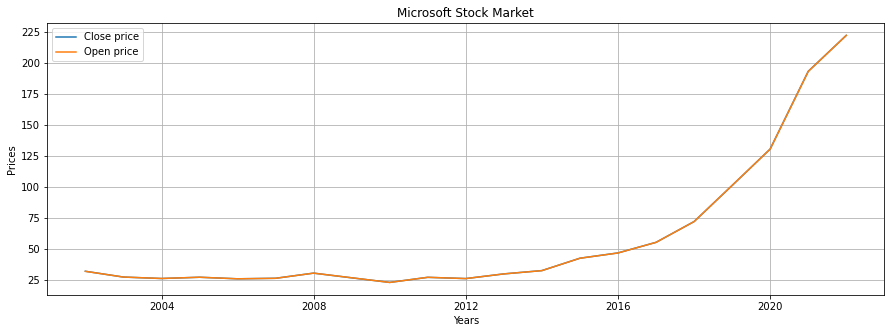

In [153]:
# see the data frame as yearly
plt.figure(figsize=(15,5))
plt.grid(True)
plt.xlabel('Years')
plt.ylabel('Prices')
plt.plot(microsoft.resample('A').mean()[['close','open']]) 
plt.title('Microsoft Stock Market')
plt.legend( ["Close price", "Open price"])
plt.show()


**Seems The stock proce increased in the last few years** 

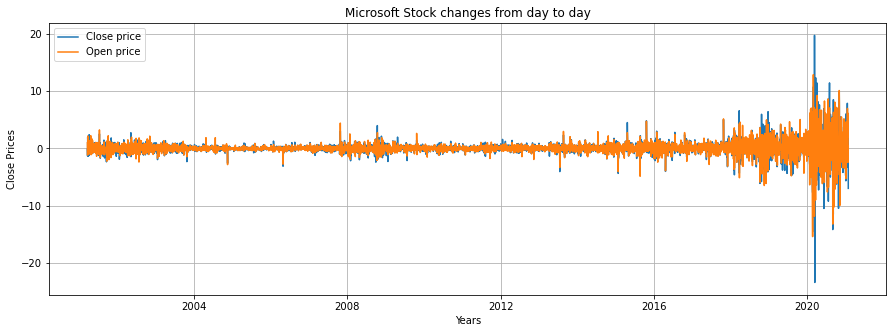

In [154]:
# the difference between day to day
#plot close price
plt.figure(figsize=(15,5))
plt.grid(True)
plt.xlabel('Years')
plt.ylabel('Close Prices')
plt.plot(microsoft.diff()[['close','open']])
plt.title('Microsoft Stock changes from day to day')
plt.legend( ["Close price", "Open price"])
plt.show()


In [1]:
from statsmodels.graphics.tsaplots import plot_acf

fig, ax = plt.subplots(figsize=(12,5))
plot_acf(microsoft['close'], lags=20, ax=ax)  # default alpha=0.05
plt.show()

NameError: name 'plt' is not defined

### Save data

In [155]:
# save the file
microsoft.to_csv('../project-3/MSFT_Stock.csv')

### Kaggle Link
- [MSFT Stock market](https://www.kaggle.com/rawaneid/starter-microsoft-stock-market-2002-2021)